In [3]:
import time
import pandas as pd
import psycopg2
import datetime
from tqdm import trange

In [4]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 
# %matplotlib inline 
import platform
from matplotlib import font_manager, rc # plt.rcParams['axes.unicode_minus'] = False 
if platform.system() == 'Darwin': rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
    path = "c:/Windows/Fonts/malgun.ttf" 
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name) 
else: 
    print('Unknown system... sorry~~~~')


In [5]:
# DB 연결 부분
uswer = 'dt.intern'
host = '10.80.0.234'
port = '5439'
dbname = 'fnf'
con = psycopg2.connect(dbname='fnf',host='10.80.0.234', port='5439', user = 'dt.intern', password='DTintn0926')
cur = con.cursor()


# 지역별 세분화

In [71]:
start = time.time()

sql1 = '''
SELECT shop.shopkey,shop.shop_nm,shop.region_nm,sales.scskey,sales.saledate,sales.qty,sales.amt_act,prdt.partcode_nm,prdt.sellprice 
FROM ax.mvw_f_sales sales
INNER JOIN ax.vw_d_shop shop ON sales.shopkey  = shop.shopkey
INNER JOIN ax.vw_d_prdt prdt ON sales.scskey  = prdt .scskey
WHERE sales.brand = 'X' AND sales.saledate BETWEEN To_date('2019-01-01', 'YYYY-MM-DD') AND
                           To_date('2019-12-31', 'YYYY-MM-DD') AND shop.type_ax_zone_nm='국내';
'''
cur.execute(sql1)
result1 = cur.fetchall()

region_df = pd.DataFrame(result1)
region_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(region_df)

time : 59.70758128166199
              0              1   2                   3           4  5  \
0        X30004      온라인쇼핑몰(직)  서울  X19FDXSH04961CG235  2019-11-21  1   
1        X50006        제주(대-위)  제주   X19SDXCP37911BK58  2019-06-09  1   
2        X50130      NC야탑(대-위)  경기  X18SDXBG38811MG19L  2019-02-21  1   
3        X10019           롯데대구  대구  X19FDMSS71961CR105  2019-12-13  1   
4        X50075  속초(대-위)-close  강원  X19SDXRT7G931BK110  2019-07-31  1   
...         ...            ...  ..                 ...         ... ..   
3406045  X10057           현대목동  서울  X19SDXSH09911BE235  2019-05-18  1   
3406046  X10006           AK분당  경기   X19FDWHD91961DN95  2019-12-07  1   
3406047  X30004      온라인쇼핑몰(직)  서울   X18FDXMT62861BK95  2019-12-17  1   
3406048  X50073      거제고현(대-위)  경남   X19SDWTP16911OW27  2019-04-02 -1   
3406049  X50116        오산(대-위)  경기  X19FDXSS7A961CR100  2019-11-28 -1   

                  6                           7         8  
0         116100.00              [공통/아

In [ ]:
start = time.time()

sql1 = '''
SELECT shop.shopkey,shop.shop_nm,shop.region_nm,sales.scskey,sales.saledate,sales.qty,sales.amt_act,prdt.partcode_nm,prdt.sellprice 
FROM ax.mvw_f_sales sales
INNER JOIN ax.vw_d_shop shop ON sales.shopkey  = shop.shopkey
INNER JOIN ax.vw_d_prdt prdt ON sales.scskey  = prdt .scskey
WHERE sales.brand = 'X' AND sales.saledate BETWEEN To_date('2019-01-01', 'YYYY-MM-DD') AND
                           To_date('2019-12-31', 'YYYY-MM-DD') AND shop.type_ax_zone_nm='국내';
'''
cur.execute(sql1)
result1 = cur.fetchall()

region_df = pd.DataFrame(result1)
region_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(region_df)

In [72]:
region_df.columns = ['shopkey','shop_nm' ,'region_nm' ,'scskey' ,'saledate','qty','amt_act','partcode_nm','sellprice']


In [73]:
region_df

,shopkey,shop_nm,region_nm,scskey,saledate,qty,amt_act,partcode_nm,sellprice
0,X30004,온라인쇼핑몰(직),서울,X19FDXSH04961CG235,2019-11-21,1,116100.00,[공통/아울렛]버킷 디펜더,129000.0
1,X50006,제주(대-위),제주,X19SDXCP37911BK58,2019-06-09,1,39000.00,[공통]베이직로고 베이스볼캡,39000.0
2,X50130,NC야탑(대-위),경기,X18SDXBG38811MG19L,2019-02-21,1,74500.00,[공통]커넥션-U(Connection-U)백팩,149000.0
3,X10019,롯데대구,대구,X19FDMSS71961CR105,2019-12-13,1,179000.00,[아울렛][역시즌]테크 후리스 후드 자켓 (남),179000.0
4,X50075,속초(대-위)-close,강원,X19SDXRT7G931BK110,2019-07-31,1,60230.00,[백화점]엠보 로고 라운드티,69000.0
...,...,...,...,...,...,...,...,...,...
3406045,X10057,현대목동,서울,X19SDXSH09911BE235,2019-05-18,1,119000.00,[공통]버킷 디워커,129000.0
3406046,X10006,AK분당,경기,X19FDWHD91961DN95,2019-12-07,1,109000.00,[공통]여성 부클 우븐 하이브리드 HD,109000.0
3406047,X30004,온라인쇼핑몰(직),서울,X18FDXMT62861BK95,2019-12-17,1,58860.00,[백화점]빅로고 블록 맨투맨,109000.0
3406048,X50073,거제고현(대-위),경남,X19SDWTP16911OW27,2019-04-02,-1,-109000.00,[백화점]여성 에어 스트라이프 트레이닝 팬츠,109000.0


In [74]:
# 지역별 판매 데이터 구하기
region_type = region_df.drop_duplicates(['region_nm'])['region_nm']

pandas_list = []
for i in range(0,len(region_type)):
    pandas_list.append(region_df[region_df['region_nm']== region_type.iloc[i]])

In [65]:
pandas_list[0]

,shopkey,shop_nm,region_nm,scskey,saledate,qty,amt_act
0,X30004,온라인쇼핑몰(직),서울,X19FDXSH04961CG235,2019-11-21,1,116100.00
7,X10004,롯데영등포,서울,X19FDXMT7W961MG105,2019-12-30,1,79000.00
8,X30004,온라인쇼핑몰(직),서울,X19FDXSH11941WH250,2019-10-04,1,97100.00
10,X10052,롯데강남,서울,X19FDXSH70941PK240,2019-07-30,6,234000.00
12,X30004,온라인쇼핑몰(직),서울,X19SDWSW62931BK90,2019-06-01,1,46000.00
...,...,...,...,...,...,...,...
3406025,X10026,롯데김포,서울,X19SDXSH06931WH250,2019-10-06,1,90300.00
3406029,X30008,역삼(직)-close,서울,X19FDWSS72961CR95,2019-09-04,1,179000.00
3406036,X80005,무신사(제휴몰),서울,X19SDXSH09911BK270,2019-02-27,1,129000.00
3406045,X10057,현대목동,서울,X19SDXSH09911BE235,2019-05-18,1,119000.00


In [100]:
region_amt_sum = []
for i in range(0,len(pandas_list)):
    shop_id = list(pandas_list[i]['shopkey'].unique()) ## 고객아이디
    shop_monetary_df = pd.DataFrame() ## 구매금액 데이터 초기화
    shop_monetary_df['shopkey'] = shop_id
    shop_nm = list(pandas_list[i]['shop_nm'].unique()) ## 고객아이디
    shop_monetary_df['shop_nm'] = shop_nm
    # 지역별 매장 총 구매금액 
    from tqdm import tqdm

    monetary_data = [] ## 구매금액을 담을 리스트
    for ci in tqdm(shop_id,position=0,desc='Calculating amount of individual customer'):
        temp = pandas_list[i].query('shopkey==@ci') ## 해당 아이디의 고객데이터 추출
        amount = sum(temp['amt_act']) ## 해당 고객 구매금액
        monetary_data.append(amount)
    df1 = pd.DataFrame(shop_monetary_df)
    df2 = pd.DataFrame(monetary_data)
    result = pd.concat([df1,df2],axis=1)
    result.columns = ['shopkey','shop_nm','amt']
    region_amt_sum.append(result)
    print(len(region_amt_sum))

Calculating amount of individual customer: 100%|█████████████████████████████████████████| 3/3 [00:00<00:00, 65.93it/s]


1
2


Calculating amount of individual customer:  30%|████████████                            | 3/10 [00:00<00:00, 28.86it/s]

3


Calculating amount of individual customer: 100%|█████████████████████████████████████████| 6/6 [00:00<00:00, 51.15it/s]


4
5


Calculating amount of individual customer: 100%|█████████████████████████████████████████| 7/7 [00:00<00:00, 48.42it/s]


6
7


Calculating amount of individual customer:  56%|██████████████████████▊                  | 5/9 [00:00<00:00, 46.98it/s]

8


Calculating amount of individual customer:  31%|████████████▎                           | 4/13 [00:00<00:00, 36.09it/s]

9


Calculating amount of individual customer:  36%|██████████████▌                         | 4/11 [00:00<00:00, 34.00it/s]

10


Calculating amount of individual customer:  20%|████████                                | 3/15 [00:00<00:00, 27.58it/s]

11


Calculating amount of individual customer:  50%|████████████████████                    | 5/10 [00:00<00:00, 45.79it/s]

12


Calculating amount of individual customer:  62%|█████████████████████████▋               | 5/8 [00:00<00:00, 42.40it/s]

13


Calculating amount of individual customer:  33%|█████████████▎                          | 4/12 [00:00<00:00, 31.49it/s]

14


Calculating amount of individual customer: 100%|█████████████████████████████████████████| 7/7 [00:00<00:00, 49.78it/s]


15
16


Calculating amount of individual customer: 100%|████████████████████████████████████████| 2/2 [00:00<00:00, 401.66it/s]

17


In [101]:
for i in range(0,len(region_amt_sum)):
    print(region_amt_sum[i])

   shopkey            shop_nm             amt
0   X30004          온라인쇼핑몰(직)  13972475450.00
1   X10004              롯데영등포   3213765690.00
2   X10052               롯데강남   1184264200.00
3   X80005           무신사(제휴몰)   9221642433.00
4   X10009               현대신촌   2648299420.00
5   X10076               현대미아   1558317350.00
6   X10064               현대천호   2808610640.00
7   X10020              롯데청량리   1234165860.00
8   X10070              신세계강남   2495019605.00
9   X10047              마리오구로   2057361090.00
10  X70010   2001중계(상-위)close    291534860.00
11  X10057               현대목동   2825395830.00
12  X10025               롯데노원   2256234530.00
13  X10086            현대디큐브시티    919736885.00
14  X10050               롯데본점   5758141260.00
15  X10011               롯데미아   1406199920.00
16  X10074        신세계영등포close    428124420.00
17  X30015           타임스퀘어(직)   1760890450.00
18  X30027     현대가든5(직)-close   1681232570.00
19  X10080             엔터6왕십리   1400692805.00
20  X10065               현대무역   15

In [132]:
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

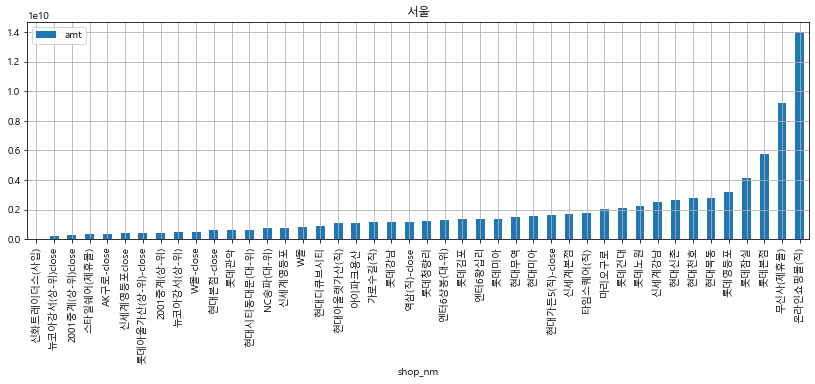

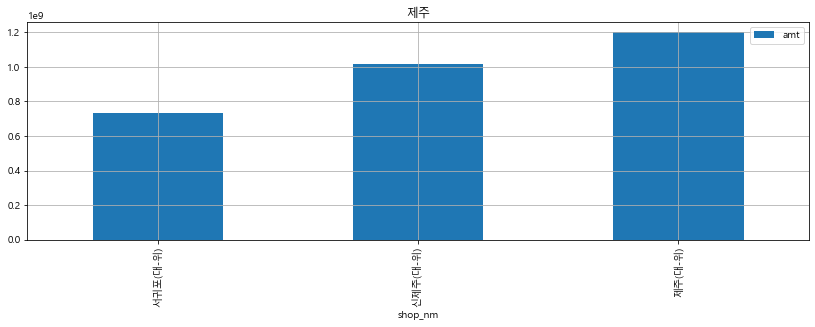

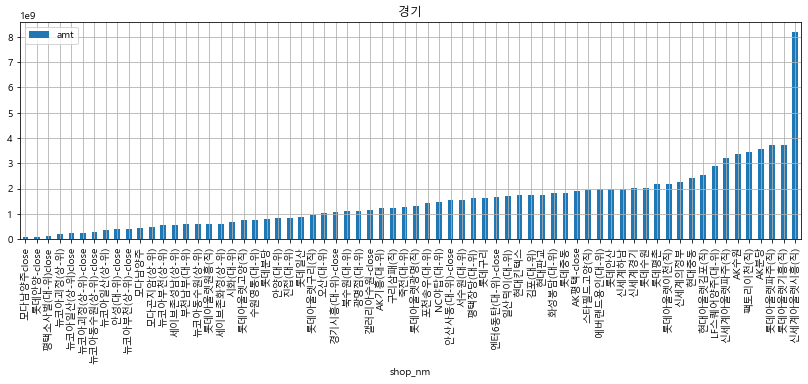

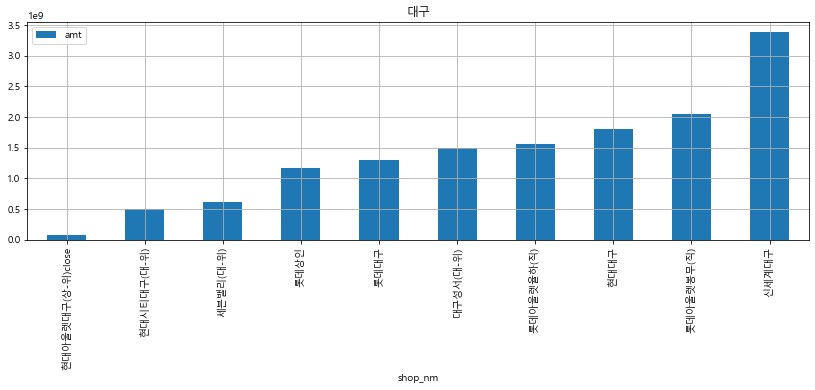

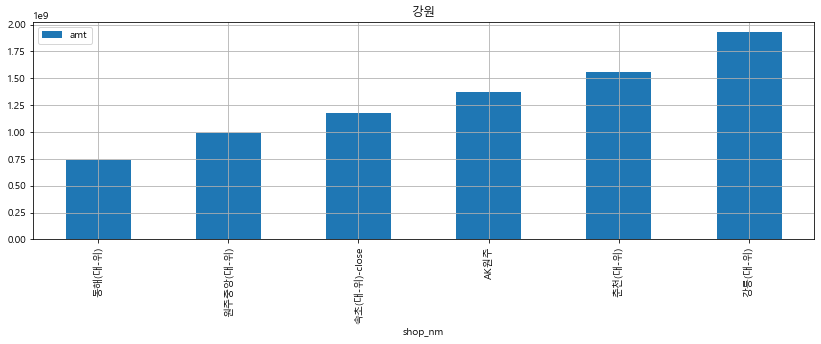

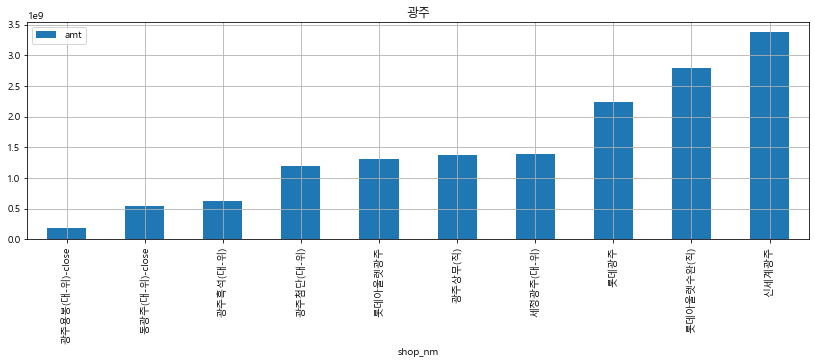

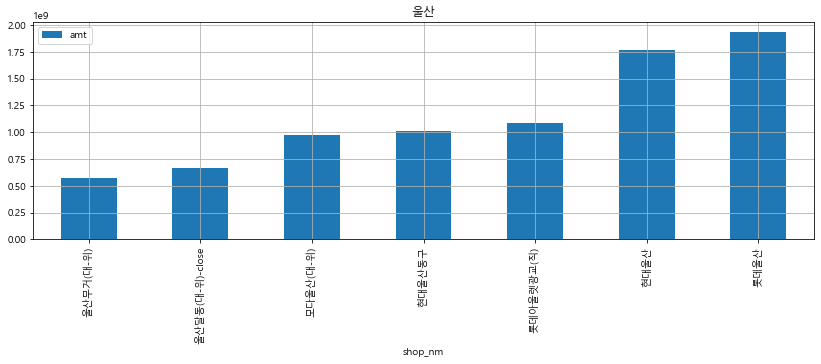

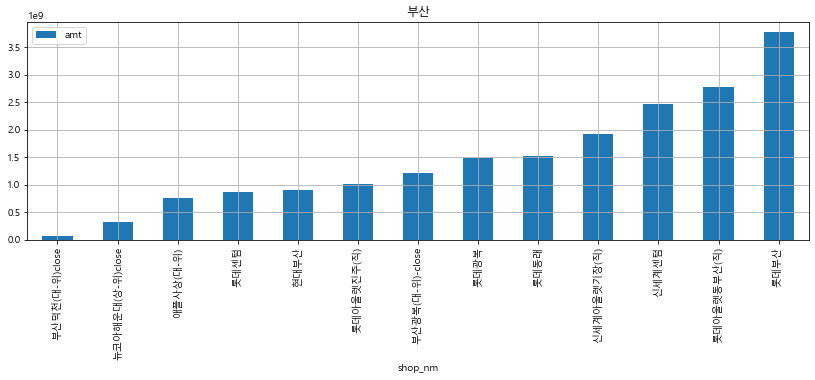

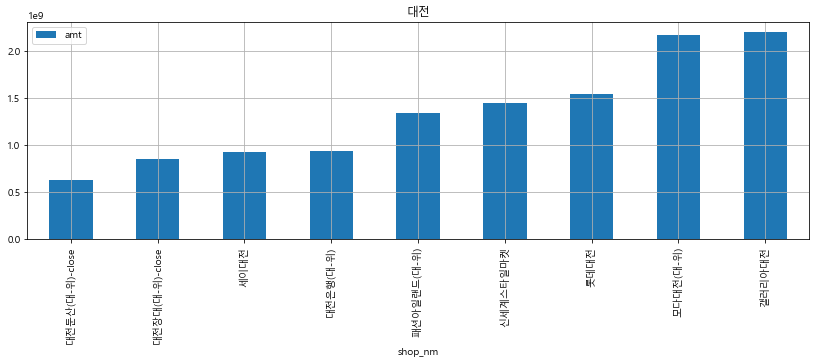

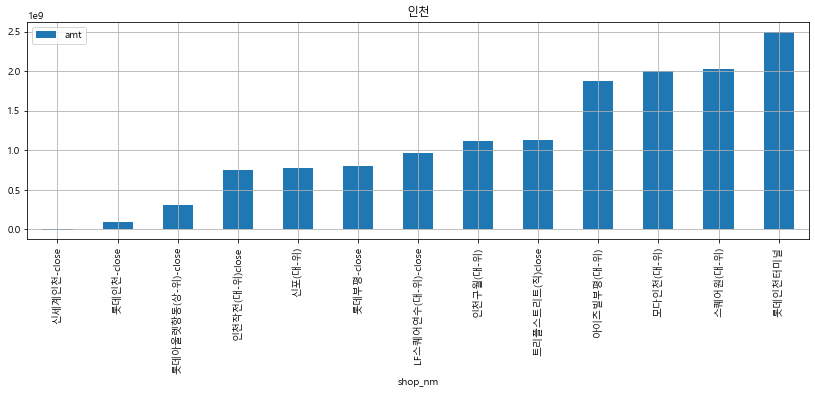

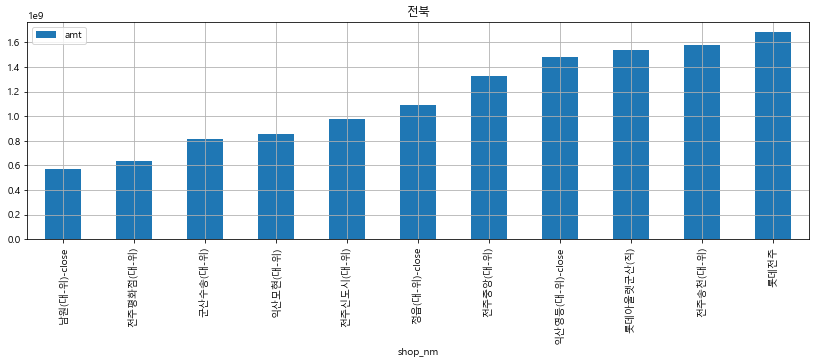

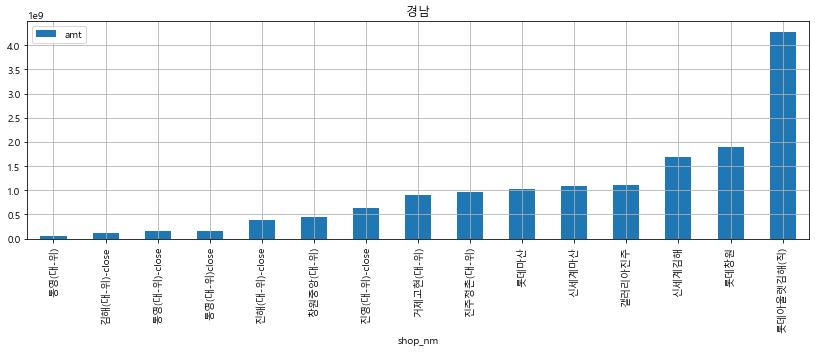

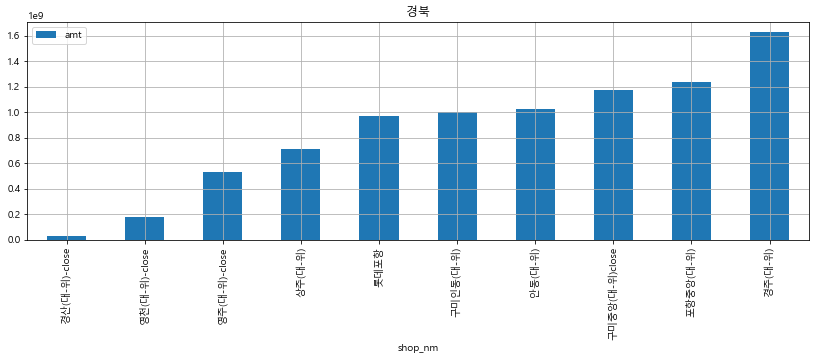

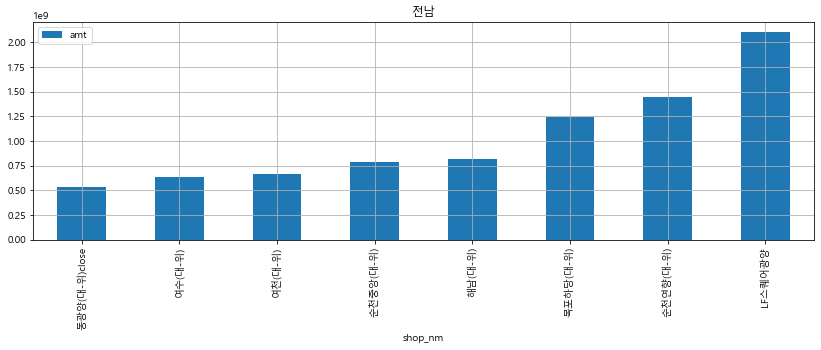

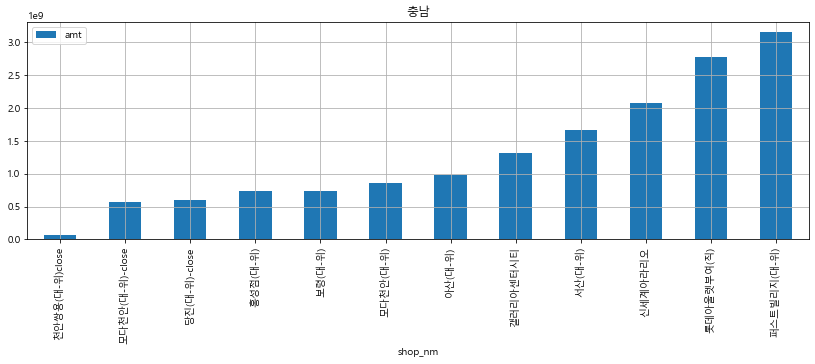

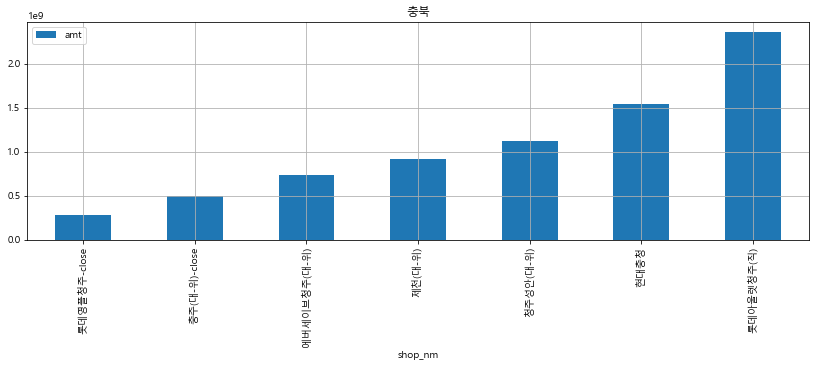

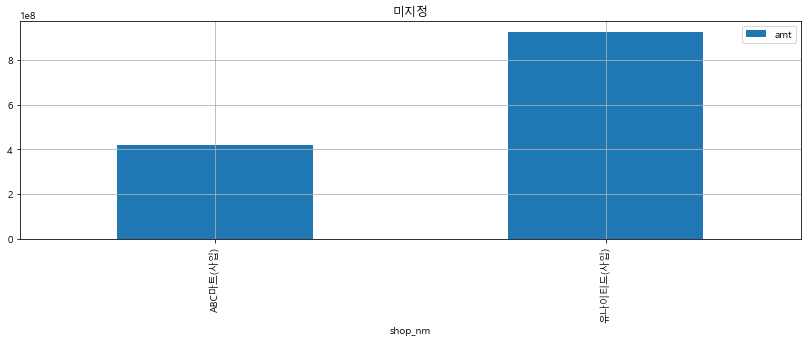

In [170]:
for i in range(0,len(region_amt_sum)):
    region_amt_sum[i]['amt']= region_amt_sum[i]['amt'].astype(float)
    test1 = region_amt_sum[i].set_index('shop_nm')
    test1.sort_values(by='amt').plot(kind='bar',title=region_type.iloc[i])

In [165]:
test1['amt'].max()

13972475450.0

In [167]:
(test1['amt'].iloc[0]-test1['amt'].min()) /(test1['amt'].max() - test1['amt'].min())

1.0

In [171]:
test1

,shopkey,amt
shop_nm,,
ABC마트(사입),X85000,417275000.0
유나이티드(사입),X85002,926266000.0


In [168]:
for i in range(0,len(region_amt_sum)):
    region_amt_sum[i]['amt']= region_amt_sum[i]['amt'].astype(float)
    test1 = region_amt_sum[i].set_index('shop_nm')
    test1['min_max'] = (test1['amt'].iloc[i]-test1['amt'].min()) /(test1['amt'].max() - test1['amt'].min())
    test1.sort_values(by='min_max').plot(kind='bar',title=region_type.iloc[i])

13972475450.0

# 매장별 매출 분석 추이

In [217]:
start = time.time()

sql2 = '''
SELECT shop.shopkey,shop.shop_nm,shop.region_nm,sales.scskey,sales.saledate,sales.qty,sales.amt_act,prdt.partcode_nm,prdt.sellprice, prdt.medium_ctgr,prdt.small_ctgr
FROM ax.mvw_f_sales sales
INNER JOIN ax.vw_d_shop shop ON sales.shopkey  = shop.shopkey
INNER JOIN ax.vw_d_prdt prdt ON sales.scskey  = prdt .scskey
WHERE sales.brand = 'X' AND sales.saledate BETWEEN To_date('2019-01-01', 'YYYY-MM-DD') AND
                           To_date('2019-12-31', 'YYYY-MM-DD') AND shop.type_ax_zone_nm='국내';
'''
cur.execute(sql2)
result2 = cur.fetchall()

region_df2 = pd.DataFrame(result2)
region_df2

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(region_df2)

time : 92.6847243309021
             0              1   2                   3           4   5   \
0        X30004      온라인쇼핑몰(직)  서울  X19FDXSH04961CG235  2019-11-21   1   
1        X50006        제주(대-위)  제주   X19SDXCP37911BK58  2019-06-09   1   
2        X50130      NC야탑(대-위)  경기  X18SDXBG38811MG19L  2019-02-21   1   
3        X10019           롯데대구  대구  X19FDMSS71961CR105  2019-12-13   1   
4        X50075  속초(대-위)-close  강원  X19SDXRT7G931BK110  2019-07-31   1   
...         ...            ...  ..                 ...         ...  ..   
3406045  X10057           현대목동  서울  X19SDXSH09911BE235  2019-05-18   1   
3406046  X10006           AK분당  경기   X19FDWHD91961DN95  2019-12-07   1   
3406047  X30004      온라인쇼핑몰(직)  서울   X18FDXMT62861BK95  2019-12-17   1   
3406048  X50073      거제고현(대-위)  경남   X19SDWTP16911OW27  2019-04-02  -1   
3406049  X50116        오산(대-위)  경기  X19FDXSS7A961CR100  2019-11-28  -1   

                 6                           7         8       9         10  
0        

In [218]:
region_df2.columns = ['shopkey','shop_nm' ,'region_nm' ,'scskey' ,'saledate','qty','amt_act','partcode_nm','sellprice','medium_ctgr','small_ctgr']


In [219]:
# 지역별 판매 데이터 구하기
region_type2 = region_df2.drop_duplicates(['region_nm'])['region_nm']

pandas_list2 = []
for i in range(0,len(region_type)):
    pandas_list2.append(region_df2[region_df2['region_nm']== region_type2.iloc[i]])

In [178]:
# 지역별 - 매장별 판매 세분화 
region_shop_type2 = pandas_list2[0].drop_duplicates(['shopkey'])['shopkey']
region_shop_type2

0         X30004
7         X10004
10        X10052
26        X80005
33        X10009
41        X10076
43        X10064
49        X10020
50        X10070
65        X10047
69        X70010
71        X10057
89        X10025
95        X10086
98        X10050
122       X10011
125       X10074
145       X30015
159       X30027
240       X10080
254       X10065
302       X10018
303       X50137
305       X10026
317       X10075
339       X10008
347       X50125
357       X10089
364       X70016
371       X10048
379       X70014
451       X50138
491       X30034
757       X10045
760       X30008
797       X80008
1052      X70012
1154      X10090
1380      X10083
1416      X10040
1466      X30036
1482      X70008
2499      X10037
231217    X85001
Name: shopkey, dtype: object

In [201]:
# 지역별 - 매장별 - 물건별 판매금액 / 수량
for i in region_shop_type:
#     print(pandas_list[0][pandas_list[0]['shopkey']==i])
    print(pandas_list[0][pandas_list[0]['shopkey']==i].groupby('partcode_nm').sum()[['qty']])
    print(pandas_list[0][pandas_list[0]['shopkey']==i][['partcode_nm','amt_act']].groupby('partcode_nm').sum())
    print(pandas_list[0][pandas_list[0]['shopkey']==i].groupby('partcode_nm').mean()[['sellprice']])
    break

                           qty
partcode_nm                   
LiKE 슬링백                   145
Online)가슴 스몰로고 포인트 라운드 티   843
Online)남성 베이직 로고형 래쉬가드     415
Online)여성 베이직 로고형 래쉬가      207
[CO]버킷 디워커 V2             1383
...                        ...
배색 로우 삭스                     5
베이직 페이크 삭스                  34
솔리드 로우 삭스                   21
솔리드 앵클 삭스                   25
워딩 미드 삭스                    14

[1812 rows x 1 columns]
                               amt_act
partcode_nm                           
LiKE 슬링백                    9824640.00
Online)가슴 스몰로고 포인트 라운드 티   33544670.00
Online)남성 베이직 로고형 래쉬가드     22537800.00
Online)여성 베이직 로고형 래쉬가      11344990.00
[CO]버킷 디워커 V2             171498250.00
...                                ...
배색 로우 삭스                      53680.00
베이직 페이크 삭스                   159420.00
솔리드 로우 삭스                    183610.00
솔리드 앵클 삭스                    186530.00
워딩 미드 삭스                     131190.00

[1812 rows x 1 columns]
                          sellprice
part

KeyboardInterrupt: 

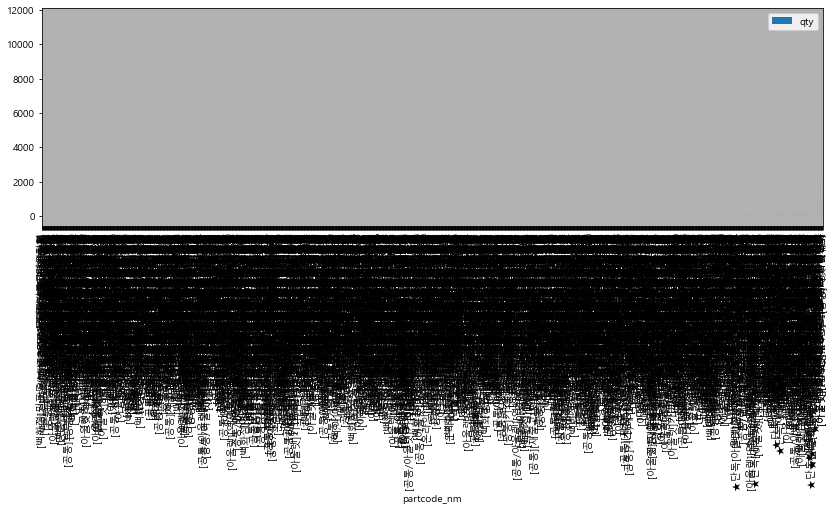

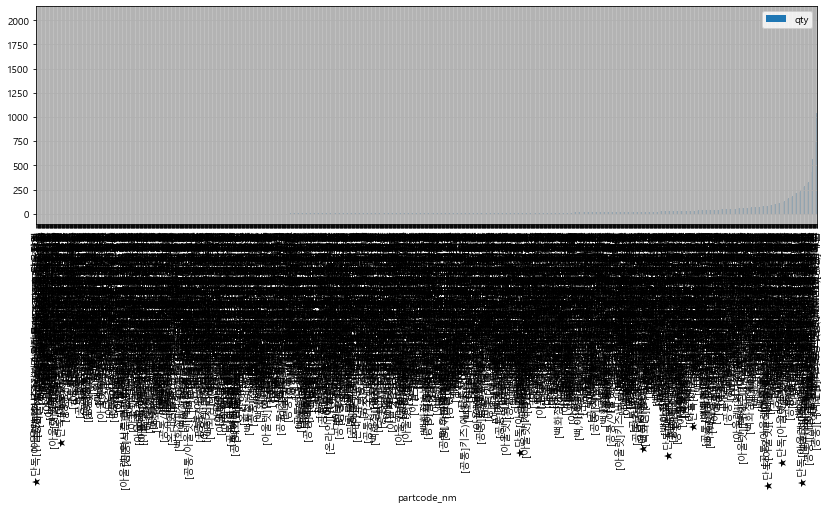

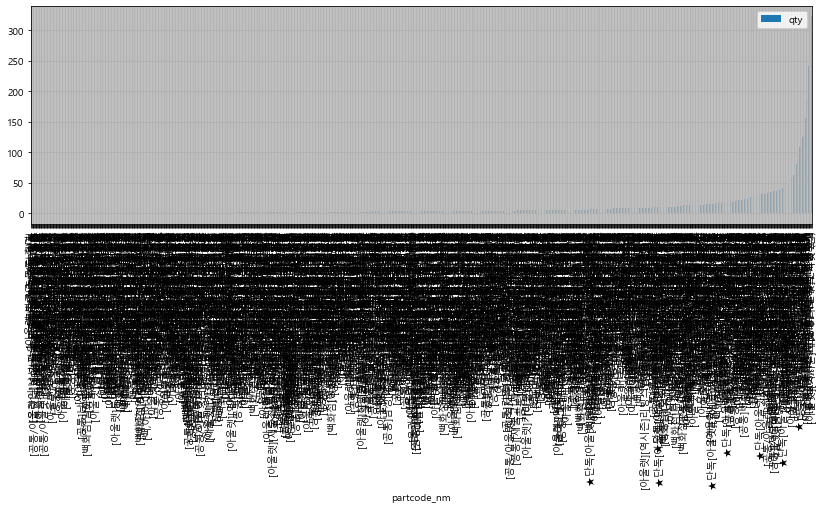

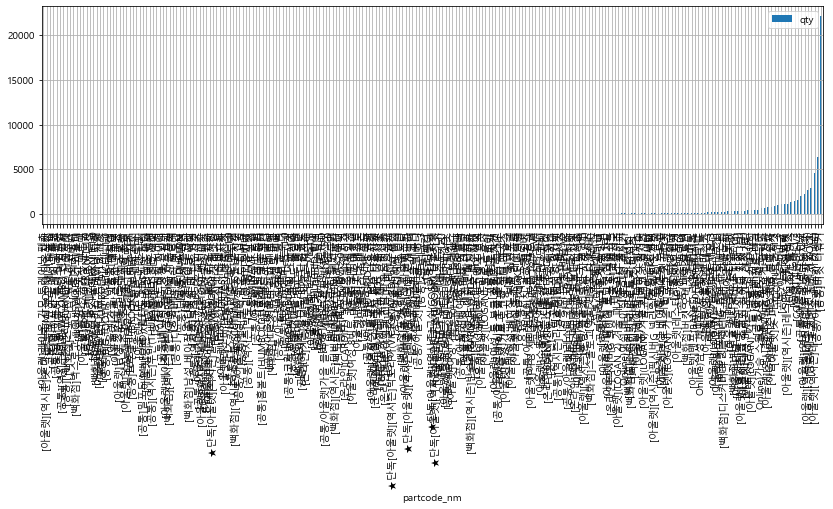

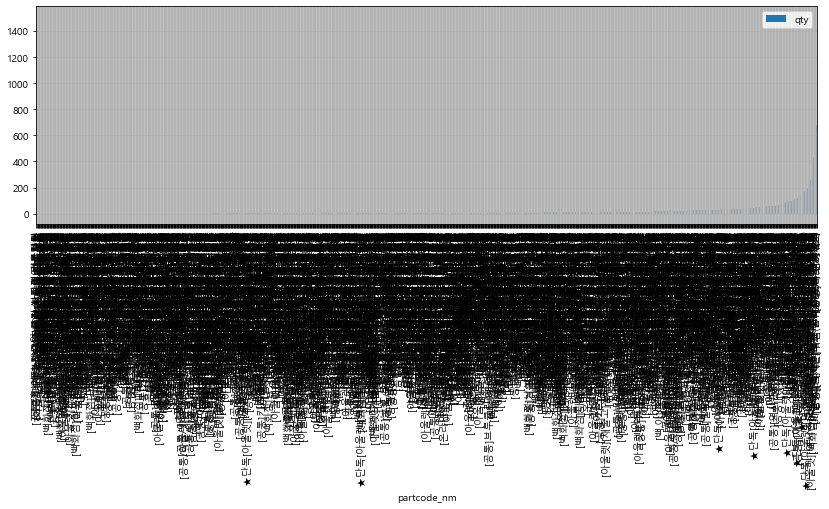

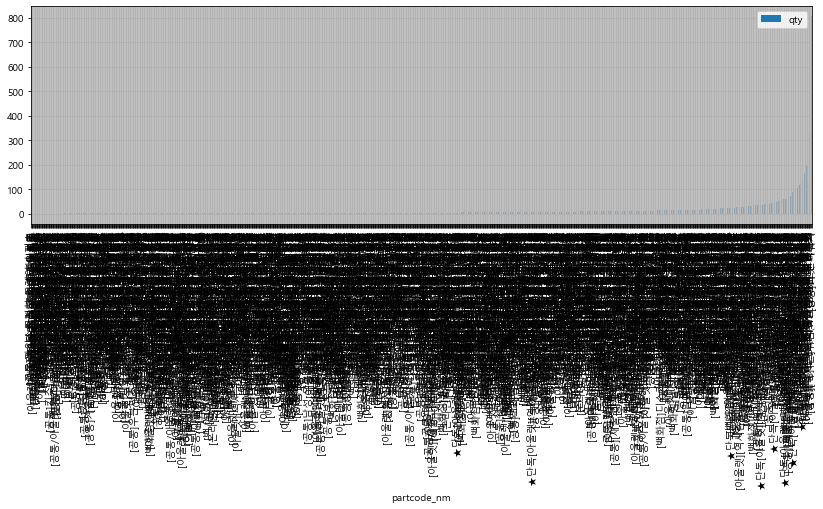

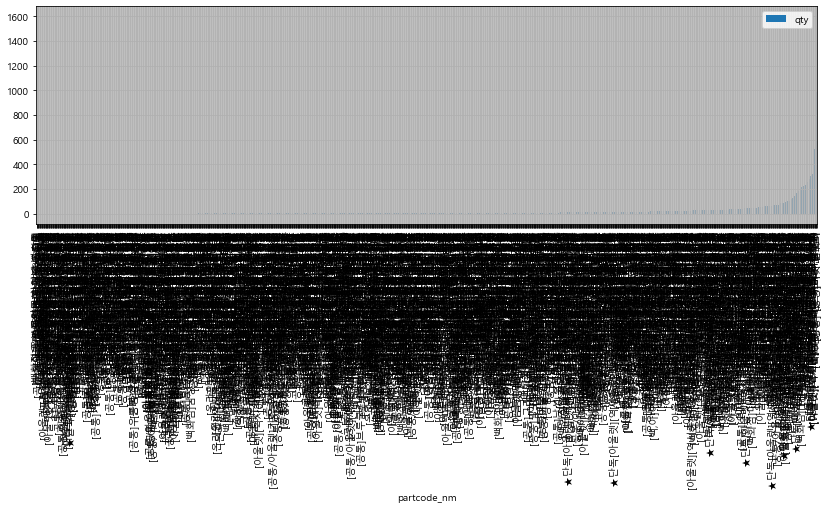

Error in callback <function flush_figures at 0x0000023493CC4DC0> (for post_execute):


KeyboardInterrupt: 

In [209]:
# 지역별 - 매장별 - 물건별 판매금액 / 수량
for i in region_shop_type:
#     print(pandas_list[0][pandas_list[0]['shopkey']==i])
    reg_shop_prod_qty= pandas_list[0][pandas_list[0]['shopkey']==i].groupby('partcode_nm').sum()[['qty']]
    reg_shop_prod_qty['qty']= reg_shop_prod_qty['qty'].astype(float)
#     test2 = reg_shop_prod_qty.set_index('partcode_nm')
    test2 = reg_shop_prod_qty
    test2.sort_values(by='qty').plot(kind='bar')
#     print(pandas_list[0][pandas_list[0]['shopkey']==i][['partcode_nm','amt_act']].groupby('partcode_nm').sum())
#     print(pandas_list[0][pandas_list[0]['shopkey']==i].groupby('partcode_nm').mean()[['sellprice']])
#     break

In [211]:
reg_shop_prod_qty['qty']

partcode_nm
LiKE 슬링백                         10.0
[공통/아울렛]2in1 쇼츠 레깅스               1.0
[공통/아울렛]BLANC 백팩                  1.0
[공통/아울렛]LiKE_U 백팩                 0.0
[공통/아울렛]U-미니 슬링백                  2.0
                                 ... 
★단독[아울렛]키즈) 밀포드(MILFORD) 다운자켓     0.0
딥 페이크 삭스                          3.0
배색 로우 삭스                          1.0
베이직 페이크 삭스                        2.0
솔리드 앵클 삭스                         1.0
Name: qty, Length: 442, dtype: float64

In [208]:
reg_shop_prod_qty['qty']

partcode_nm
LiKE 슬링백                     145.0
Online)가슴 스몰로고 포인트 라운드 티     843.0
Online)남성 베이직 로고형 래쉬가드       415.0
Online)여성 베이직 로고형 래쉬가        207.0
[CO]버킷 디워커 V2               1383.0
                             ...  
배색 로우 삭스                       5.0
베이직 페이크 삭스                    34.0
솔리드 로우 삭스                     21.0
솔리드 앵클 삭스                     25.0
워딩 미드 삭스                      14.0
Name: qty, Length: 1812, dtype: float64

In [203]:
pandas_list[0][pandas_list[0]['shopkey']==i][['partcode_nm','amt_act']].groupby('partcode_nm').sum()

,amt_act
partcode_nm,
LiKE 슬링백,9824640.00
Online)가슴 스몰로고 포인트 라운드 티,33544670.00
Online)남성 베이직 로고형 래쉬가드,22537800.00
Online)여성 베이직 로고형 래쉬가,11344990.00
[CO]버킷 디워커 V2,171498250.00
...,...
배색 로우 삭스,53680.00
베이직 페이크 삭스,159420.00
솔리드 로우 삭스,183610.00


In [204]:
pandas_list[0][pandas_list[0]['shopkey']==i].groupby('partcode_nm').mean()[['sellprice']]

,sellprice
partcode_nm,
LiKE 슬링백,79000.0
Online)가슴 스몰로고 포인트 라운드 티,49000.0
Online)남성 베이직 로고형 래쉬가드,59000.0
Online)여성 베이직 로고형 래쉬가,59000.0
[CO]버킷 디워커 V2,139000.0
...,...
배색 로우 삭스,11000.0
베이직 페이크 삭스,7000.0
솔리드 로우 삭스,10000.0


# 카테고리별 총 매출

In [18]:

start = time.time()

sql3 = '''
SELECT shop.shopkey,shop.shop_nm,shop.region_nm,sales.scskey,sales.saledate,sales.qty,sales.amt_act,prdt.partcode_nm,prdt.sellprice, prdt.ctgr,prdt.item, prdt.siz, prdt.color
FROM ax.mvw_f_sales sales
INNER JOIN ax.vw_d_shop shop ON sales.shopkey  = shop.shopkey
INNER JOIN ax.vw_d_prdt prdt ON sales.scskey  = prdt .scskey
WHERE sales.brand = 'X' AND sales.saledate BETWEEN To_date('2018-01-01', 'YYYY-MM-DD') AND
                           To_date('2020-12-31', 'YYYY-MM-DD') AND shop.type_ax_zone_nm='국내';
'''
cur.execute(sql3)
result3 = cur.fetchall()

region_df3 = pd.DataFrame(result3)
region_df3

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(region_df3)

time : 220.6115119457245
              0          1   2                   3           4   5   \
0         X30004  온라인쇼핑몰(직)  서울  X19FDXSH04961CG235  2019-11-21   1   
1         X50006    제주(대-위)  제주   X19SDXCP37911BK58  2019-06-09   1   
2         X50130  NC야탑(대-위)  경기  X18SDXBG38811MG19L  2019-02-21   1   
3         X10061      신세계대구  대구  X18FDMDJ77861LG105  2018-12-14   1   
4         X50162    영주(대-위)  경북  X20SDXSHA5011OW230  2020-10-23   1   
...          ...        ...  ..                 ...         ...  ..   
10243254  X10065       현대무역  서울  X19SDMTS7A931OW100  2020-07-09   1   
10243255  X30004  온라인쇼핑몰(직)  서울   X18FDXMT62861BK95  2019-12-17   1   
10243256  X50073  거제고현(대-위)  경남   X19SDWTP16911OW27  2019-04-02  -1   
10243257  X50116    오산(대-위)  경기  X19FDXSS7A961CR100  2019-11-28  -1   
10243258  X10004      롯데영등포  서울  X19SDXRT57931WH110  2020-06-01   1   

                  6                          7         8      9    10  11  
0          116100.00             [공통/아울렛]버킷 디펜

In [19]:
region_df3.columns = ['shopkey','shop_nm' ,'region_nm' ,'scskey' ,'saledate','qty','amt_act','partcode_nm','sellprice','ctgr','siz','color']
region_df3

,shopkey,shop_nm,region_nm,scskey,saledate,qty,amt_act,partcode_nm,sellprice,ctgr,siz,color
0,X30004,온라인쇼핑몰(직),서울,X19FDXSH04961CG235,2019-11-21,1,116100.00,[공통/아울렛]버킷 디펜더,129000.0,운동화,235,CG
1,X50006,제주(대-위),제주,X19SDXCP37911BK58,2019-06-09,1,39000.00,[공통]베이직로고 베이스볼캡,39000.0,모자,58,BK
2,X50130,NC야탑(대-위),경기,X18SDXBG38811MG19L,2019-02-21,1,74500.00,[공통]커넥션-U(Connection-U)백팩,149000.0,None,19L,MG
3,X10061,신세계대구,대구,X18FDMDJ77861LG105,2018-12-14,1,255620.00,[아울렛]바이른(BAIREN) RDS 다운자켓,279000.0,None,105,LG
4,X50162,영주(대-위),경북,X20SDXSHA5011OW230,2020-10-23,1,139000.00,[CO]버킷 디워커 V2,139000.0,운동화,230,OW
...,...,...,...,...,...,...,...,...,...,...,...,...
10243254,X10065,현대무역,서울,X19SDMTS7A931OW100,2020-07-09,1,39600.00,[공통]에리 포인트 폴로티셔츠,99000.0,티셔츠,100,OW
10243255,X30004,온라인쇼핑몰(직),서울,X18FDXMT62861BK95,2019-12-17,1,58860.00,[백화점]빅로고 블록 맨투맨,109000.0,None,95,BK
10243256,X50073,거제고현(대-위),경남,X19SDWTP16911OW27,2019-04-02,-1,-109000.00,[백화점]여성 에어 스트라이프 트레이닝 팬츠,109000.0,트레이닝복,27,OW
10243257,X50116,오산(대-위),경기,X19FDXSS7A961CR100,2019-11-28,-1,-179000.00,[아울렛]테크 후리스 하이넥 자켓 (유니),179000.0,후리스,100,CR


In [27]:
sum_ctgr_act_2018 = region_df3[ (region_df3['saledate'] >= datetime.date(2018,1,1)) & (region_df3['saledate'] <= datetime.date(2018,12,31)) ]
sum_ctgr_act_2019 = region_df3[ (region_df3['saledate'] >= datetime.date(2019,1,1)) & (region_df3['saledate'] <= datetime.date(2019,12,31)) ]
sum_ctgr_act_2020 = region_df3[ (region_df3['saledate'] >= datetime.date(2020,1,1)) & (region_df3['saledate'] <= datetime.date(2020,12,31)) ]

In [28]:
sum_ctgr_act_gro_2018 = sum_ctgr_act_2018[['ctgr','amt_act']].groupby('ctgr').sum()[['amt_act']]
sum_ctgr_act_gro_2019 = sum_ctgr_act_2019[['ctgr','amt_act']].groupby('ctgr').sum()[['amt_act']]
sum_ctgr_act_gro_2020 = sum_ctgr_act_2020[['ctgr','amt_act']].groupby('ctgr').sum()[['amt_act']]


In [30]:
sum_ctgr_act_gro_2018['amt_act']= sum_ctgr_act_gro_2018['amt_act'].astype(float)
sum_ctgr_act_gro_2019['amt_act']= sum_ctgr_act_gro_2019['amt_act'].astype(float)
sum_ctgr_act_gro_2020['amt_act']= sum_ctgr_act_gro_2020['amt_act'].astype(float)


<AxesSubplot:xlabel='ctgr'>

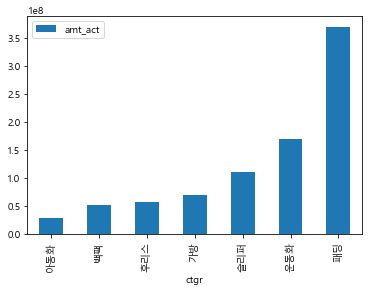

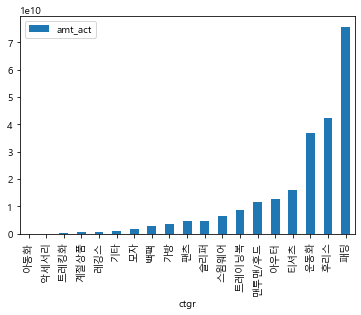

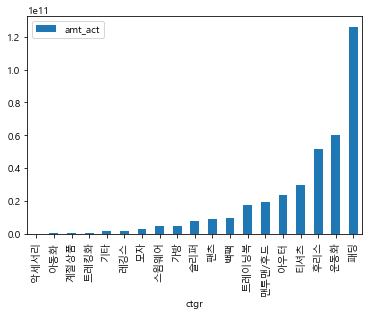

In [33]:
sum_ctgr_act_gro_2018.sort_values(by='amt_act').plot(kind='bar')
sum_ctgr_act_gro_2019.sort_values(by='amt_act').plot(kind='bar')
sum_ctgr_act_gro_2020.sort_values(by='amt_act').plot(kind='bar')


In [43]:
sum_ctgr_act_gro_2020.loc['운동화'][0] /  sum_ctgr_act_gro_2019.loc['운동화'][0] *100

163.1727901848398

In [45]:
sum_ctgr_act_gro_2020.loc['패딩'][0] /  sum_ctgr_act_gro_2019.loc['패딩'][0] *100

166.5273922631067